# Web scraping and analysis

We will use a package called `BeautifulSoup` to collect the data from the web.

## Scraping data from Skytrax

We are interested in the reviews related to British Airways in [https://www.airlinequality.com].
In this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data.

In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [28]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   --> {len(reviews)} total reviews")

Scraping page 1
   --> 100 total reviews
Scraping page 2
   --> 200 total reviews
Scraping page 3
   --> 300 total reviews
Scraping page 4
   --> 400 total reviews
Scraping page 5
   --> 500 total reviews
Scraping page 6
   --> 600 total reviews
Scraping page 7
   --> 700 total reviews
Scraping page 8
   --> 800 total reviews
Scraping page 9
   --> 900 total reviews
Scraping page 10
   --> 1000 total reviews


In [29]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Had to cancel my flight month...
1,✅ Trip Verified | Flight cancelled with no rea...
2,✅ Trip Verified | This is a route I fly regula...
3,✅ Trip Verified | While BA may have made some...
4,✅ Trip Verified | British Airways new Club Sui...


In [30]:
df.to_csv("BA_reviews.csv")

In [31]:
df

,reviews
0,Not Verified | Had to cancel my flight month...
1,✅ Trip Verified | Flight cancelled with no rea...
2,✅ Trip Verified | This is a route I fly regula...
3,✅ Trip Verified | While BA may have made some...
4,✅ Trip Verified | British Airways new Club Sui...
...,...
995,✅ Trip Verified | London Heathrow to Los Angel...
996,✅ Trip Verified | CPT is definitely getting it...
997,✅ Trip Verified | Sofia to Belfast via London...
998,✅ Trip Verified | Lima to Gatwick. Helpful an...


**Removing the text before | in the reviews column**

In [32]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [33]:
df

,reviews
0,Had to cancel my flight months in advance d...
1,Flight cancelled with no reason given less th...
2,This is a route I fly regularly. Used first c...
3,While BA may have made some positive improve...
4,British Airways new Club Suite is a marked im...
...,...
995,London Heathrow to Los Angeles. Very nice exp...
996,CPT is definitely getting its act together: B...
997,Sofia to Belfast via London. The legroom on ...
998,Lima to Gatwick. Helpful and courteous cabin...


**Rule based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

**Data preprocessing approach:**

Cleaning the data

Tokenization

Enrichment – POS tagging

Stopword Removal

Obtaining the stem words

### 1) Cleaning the Data

In [34]:
import re

def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Had to cancel my flight months in advance d...,Had to cancel my flight months in advance due...
1,Flight cancelled with no reason given less th...,Flight cancelled with no reason given less th...
2,This is a route I fly regularly. Used first c...,This is a route I fly regularly Used first cl...
3,While BA may have made some positive improve...,While BA may have made some positive improvem...
4,British Airways new Club Suite is a marked im...,British Airways new Club Suite is a marked im...


### 2) Tokenization 
The process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

### 3) Enrichment – POS tagging 
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

### 4) Stopword Removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

### 5) Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

                        NLTK is a leading platform for building Python programs to work with human language data.

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libra **riesaries

In [38]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deept\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deept\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\deept\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### POS Tagging

In [37]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\deept\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\deept\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,Had to cancel my flight months in advance d...,Had to cancel my flight months in advance due...,"[(cancel, v), (flight, n), (months, n), (advan..."
1,Flight cancelled with no reason given less th...,Flight cancelled with no reason given less th...,"[(Flight, n), (cancelled, v), (reason, n), (gi..."
2,This is a route I fly regularly. Used first c...,This is a route I fly regularly Used first cl...,"[(route, n), (fly, v), (regularly, r), (Used, ..."
3,While BA may have made some positive improve...,While BA may have made some positive improvem...,"[(BA, n), (may, None), (made, v), (positive, a..."
4,British Airways new Club Suite is a marked im...,British Airways new Club Suite is a marked im...,"[(British, a), (Airways, n), (new, a), (Club, ..."


### Obtaining the stem word - Lemmatization

In [39]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Had to cancel my flight months in advance d...,Had to cancel my flight months in advance due...,"[(cancel, v), (flight, n), (months, n), (advan...",cancel flight month advance due change sched...
1,Flight cancelled with no reason given less th...,Flight cancelled with no reason given less th...,"[(Flight, n), (cancelled, v), (reason, n), (gi...",Flight cancel reason give less h departure e...
2,This is a route I fly regularly. Used first c...,This is a route I fly regularly Used first cl...,"[(route, n), (fly, v), (regularly, r), (Used, ...",route fly regularly Used first class securit...
3,While BA may have made some positive improve...,While BA may have made some positive improvem...,"[(BA, n), (may, None), (made, v), (positive, a...",BA may make positive improvement Club World ...
4,British Airways new Club Suite is a marked im...,British Airways new Club Suite is a marked im...,"[(British, a), (Airways, n), (new, a), (Club, ...",British Airways new Club Suite marked improv...


In [40]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Had to cancel my flight months in advance d...,cancel flight month advance due change sched...
1,Flight cancelled with no reason given less th...,Flight cancel reason give less h departure e...
2,This is a route I fly regularly. Used first c...,route fly regularly Used first class securit...
3,While BA may have made some positive improve...,BA may make positive improvement Club World ...
4,British Airways new Club Suite is a marked im...,British Airways new Club Suite marked improv...
...,...,...
995,London Heathrow to Los Angeles. Very nice exp...,London Heathrow Los Angeles nice experience ...
996,CPT is definitely getting its act together: B...,CPT definitely get act together BA Galleries...
997,Sofia to Belfast via London. The legroom on ...,Sofia Belfast via London legroom Sofia Heath...
998,Lima to Gatwick. Helpful and courteous cabin...,Lima Gatwick Helpful courteous cabin crew se...


In [41]:
!pip install vaderSentiment


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Had to cancel my flight months in advance d...,Had to cancel my flight months in advance due...,"[(cancel, v), (flight, n), (months, n), (advan...",cancel flight month advance due change sched...,-0.4939,Negative
1,Flight cancelled with no reason given less th...,Flight cancelled with no reason given less th...,"[(Flight, n), (cancelled, v), (reason, n), (gi...",Flight cancel reason give less h departure e...,-0.9698,Negative
2,This is a route I fly regularly. Used first c...,This is a route I fly regularly Used first cl...,"[(route, n), (fly, v), (regularly, r), (Used, ...",route fly regularly Used first class securit...,0.9571,Positive
3,While BA may have made some positive improve...,While BA may have made some positive improvem...,"[(BA, n), (may, None), (made, v), (positive, a...",BA may make positive improvement Club World ...,0.9169,Positive
4,British Airways new Club Suite is a marked im...,British Airways new Club Suite is a marked im...,"[(British, a), (Airways, n), (new, a), (Club, ...",British Airways new Club Suite marked improv...,0.6597,Positive


In [43]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    471
Negative    421
Neutral     108
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x251b2ba6630>,
 [Text(0.10007827270333483, 1.0954379669030634, 'Positive'),
  Text(-0.4589560614029004, -0.9996796155276636, 'Negative'),
  Text(1.2730371984675077, -0.44930645590509777, 'Neutral')],
 [Text(0.054588148747273545, 0.5975116183107618, '47.1%'),
  Text(-0.25033966985612743, -0.5452797902878165, '42.1%'),
  Text(0.8015419397758381, -0.2828966574217282, '10.8%')])

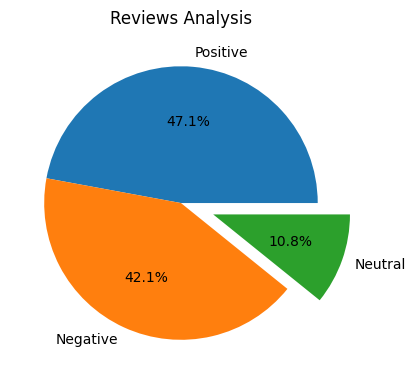

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

# Predictive modeling of customer bookings
### Exploratory data analysis

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv(r"C:\Users\deept\Downloads\customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 


- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking


In [50]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [51]:
df.shape

(50000, 14)

In [52]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

**No NULL values**

In [53]:
df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

## Mutual Information

In [54]:
X= df.drop('booking_complete',axis=1)
y= df.booking_complete         

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [55]:
X.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [57]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores

route                    0.052074
booking_origin           0.046417
flight_duration          0.015734
wants_extra_baggage      0.010502
length_of_stay           0.007915
wants_preferred_seat     0.003806
sales_channel            0.002650
wants_in_flight_meals    0.002309
num_passengers           0.002171
flight_day               0.001580
purchase_lead            0.001558
trip_type                0.000000
flight_hour              0.000000
Name: MI Scores, dtype: float64

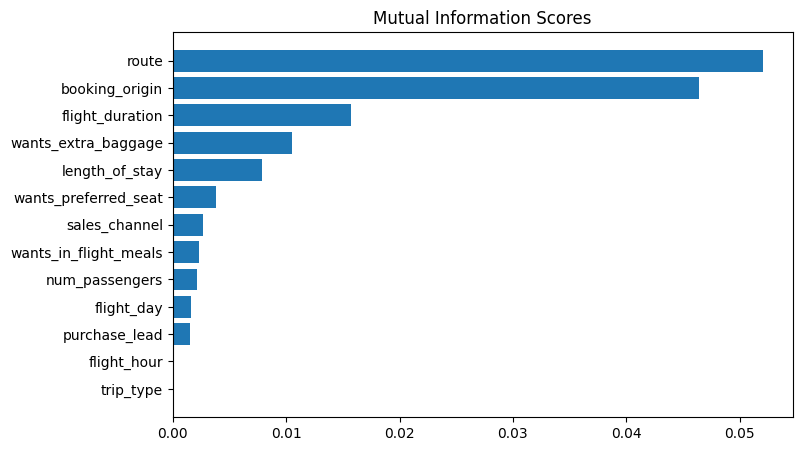

In [58]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

The top 5 features which are dependant with booking_complete feature

1. route,
2. booking_origin
3. flight_duration
4. wants_extra_baggage
5. length_of_stay

In [59]:
from sklearn.model_selection import train_test_split

# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)

In [60]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

## Model 1 : Random forest classifier with top 5 features

In [62]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay']
X= df[features]
#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df.booking_complete       

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  83.26
AUC score:  0.5554167016137819


## Model 2 : Random forest classifier with all features

In [64]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete       

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  84.76
AUC score:  0.5479604084813514


## Model 3 : XGB classifier with top 5 features

In [65]:
from xgboost import XGBClassifier

X= df[features]

#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)

y= df.booking_complete    

X_train,X_val,y_train,y_val= dataset(X,y)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.71
AUC score:  0.5210533882114016


## Model 4 : XGB classifier with all features

In [66]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete 

X_train,X_val,y_train,y_val= dataset(X,y)


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.98
AUC score:  0.5424676175552812


### Choosing XGB classifier with all features as it has the highest accuracy.

**Validating with test set**

In [67]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete 

train_full_X,test_X, train_full_y, test_y = train_test_split(X, y,test_size=0.25,random_state = 0)


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.98
AUC score:  0.5424676175552812
